Kernel: boek
https://stats.stackexchange.com/questions/585660/what-is-the-formula-for-prediction-interval-in-multivariate-case

In [26]:
import numpy as np
from Graphs import scatter_plot
from Datagenerator import generator
from OLS import OLS,confidence_int

np.random.seed(123) 

# Base case

In [27]:
X_range = [40000, 150000, 300000]
X_domain = np.linspace(X_range[0], X_range[1], 1000)
X_obs, Y_obs, X_unk, Y_unk = generator(N_obs=15, N_unk=15, X_range=X_range, sigma=.05, heterosc=False)


In [28]:
theta,  X_transpose_dot_X_inv = OLS(X_obs, Y_obs)
print(theta)
Y_hat = theta[0] + X_domain *  theta[1]
filename = "OLS_basecase.png"

[-2.21488395e+03  2.23200129e-01]


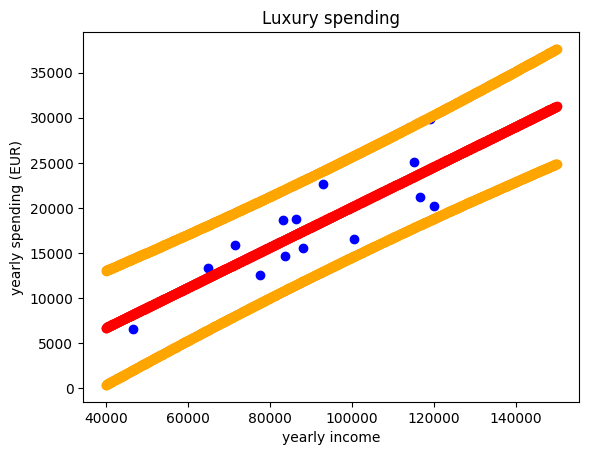

In [29]:
ci_lower_pred, ci_upper_pred = confidence_int(X_obs,  Y_obs, Y_hat, X_transpose_dot_X_inv, theta, sample=X_domain, conf_level=.9)
scatter_plot(X_obs=X_obs, X_domain=X_domain, Y_obs=Y_obs, Y_hat=Y_hat, Y_unk=None, ci_lower_pred=ci_lower_pred, \
             ci_upper_pred=ci_upper_pred, filename=filename)

## Lower confidence level

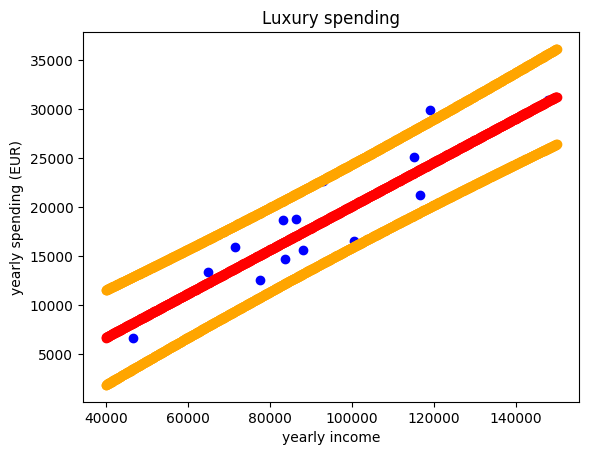

In [30]:
filename = "OLS_low_confid.png"
ci_lower_pred, ci_upper_pred = confidence_int(X_obs,  Y_obs, Y_hat, X_transpose_dot_X_inv, theta, sample=X_domain, conf_level=.8)
scatter_plot(X_obs=X_obs, X_domain=X_domain, Y_obs=Y_obs, Y_hat=Y_hat, Y_unk=None, ci_lower_pred=ci_lower_pred, \
             ci_upper_pred=ci_upper_pred, filename=filename)

## Fewer samples (epistemic uncertainty)

In [31]:
X_range_more = [40000, 150000, 300000]
X_domain_more = np.linspace(X_range[0], X_range[1], 1000)
X_obs_more, Y_obs_more, X_unk_more, Y_unk_more = generator(N_obs=5, N_unk=50, X_range=X_range, sigma=.05, heterosc=False)

In [32]:
theta_more,  X_transpose_dot_X_inv_more = OLS(X_obs_more, Y_obs_more)
Y_hat_more = theta_more[0] + X_domain_more *  theta_more[1]

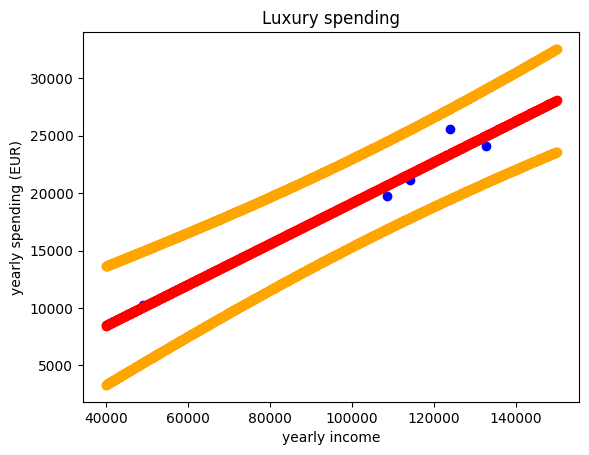

In [33]:
filename = "OLS_less_samples.png"
ci_lower_pred_more, ci_upper_pred_more = confidence_int(X_obs_more,  Y_obs_more, Y_hat_more, X_transpose_dot_X_inv_more, theta_more, sample=X_domain_more, conf_level=.9)
scatter_plot(X_obs=X_obs_more, X_domain=X_domain_more, Y_obs=Y_obs_more, Y_hat=Y_hat_more, Y_unk=None, ci_lower_pred=ci_lower_pred_more,   \
             ci_upper_pred=ci_upper_pred_more, filename=filename)

## More noise (aleatoric uncertainty)

In [34]:
X_range_more = [40000, 150000, 300000]
X_domain_more = np.linspace(X_range[0], X_range[1], 1000)
X_obs_more, Y_obs_more, X_unk_more, Y_unk_more = generator(N_obs=15, N_unk=50, X_range=X_range, sigma=.15, heterosc=False)

In [35]:
theta_more,  X_transpose_dot_X_inv_more = OLS(X_obs_more, Y_obs_more)
Y_hat_more = theta_more[0] + X_domain_more *  theta_more[1]

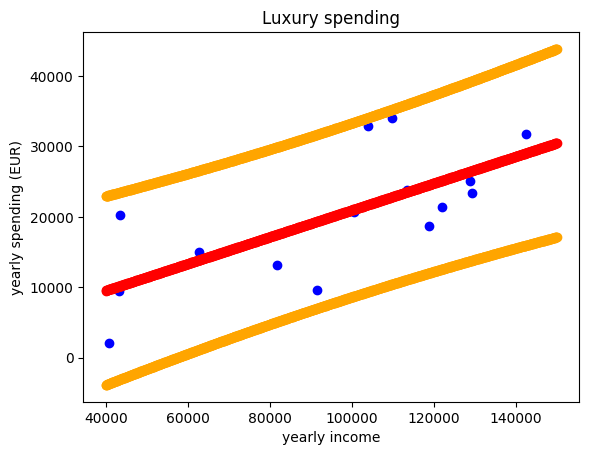

In [36]:
filename = "OLS_more_noise.png"
ci_lower_pred_more, ci_upper_pred_more = confidence_int(X_obs_more,  Y_obs_more, Y_hat_more, X_transpose_dot_X_inv_more, theta_more, sample=X_domain_more, conf_level=.9)
scatter_plot(X_obs=X_obs_more, X_domain=X_domain_more, Y_obs=Y_obs_more, Y_hat=Y_hat_more, Y_unk=None, ci_lower_pred=ci_lower_pred_more, \
             ci_upper_pred=ci_upper_pred_more, filename=filename)

## Heteroscedasticity (not allowed)

In [37]:
X_range_more = [40000, 150000, 300000]
X_domain_more = np.linspace(X_range[0], X_range[1], 1000)
X_obs_more, Y_obs_more, X_unk_more, Y_unk_more = generator(N_obs=15, N_unk=50, X_range=X_range, sigma=.15, heterosc=True)

In [ ]:
theta_more,  X_transpose_dot_X_inv_more = OLS(X_obs_more, Y_obs_more)
Y_hat_more = theta_more[0] + X_domain_more *  theta_more[1]

[7.89659882e+03 9.33012541e-02]


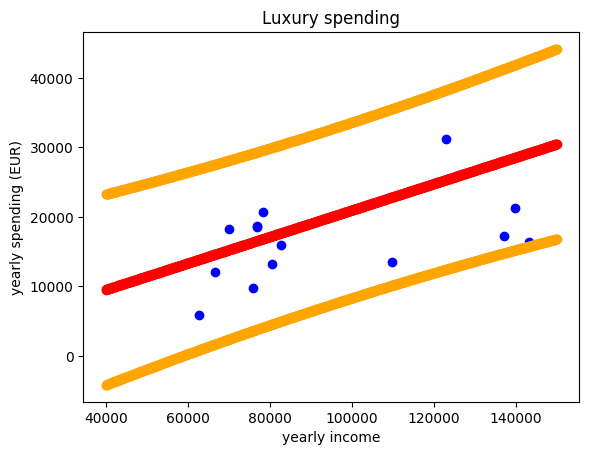

In [38]:
filename = "OLS_heteroscedastic.png"
ci_lower_pred_more, ci_upper_pred_more = confidence_int(X_obs_more,  Y_obs_more, Y_hat_more, X_transpose_dot_X_inv_more, theta_more, sample=X_domain_more, conf_level=.9)
scatter_plot(X_obs=X_obs_more, X_domain=X_domain_more, Y_obs=Y_obs_more, Y_hat=Y_hat_more, Y_unk=None, ci_lower_pred=ci_lower_pred_more, \
             ci_upper_pred=ci_upper_pred_more, filename=filename)

## Extrapollation (epistemic uncertainty)

In [39]:
X_domain = np.linspace(X_range[0], X_range[2], 1000)

In [40]:
theta,  X_transpose_dot_X_inv = OLS(X_obs, Y_obs)
Y_hat = theta[0] + X_domain *  theta[1]

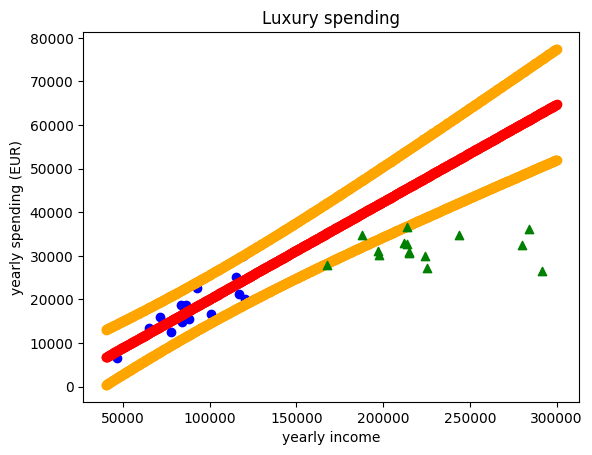

In [41]:
filename = "OLS_extrapollation.png"
ci_lower_pred, ci_upper_pred = confidence_int(X_obs,  Y_obs, Y_hat, X_transpose_dot_X_inv, theta, sample=X_domain, conf_level=.9)
scatter_plot(X_obs=X_obs, X_domain=X_domain, Y_obs=Y_obs, Y_hat=Y_hat, X_unk=X_unk, Y_unk=Y_unk, ci_lower_pred=ci_lower_pred, \
             ci_upper_pred=ci_upper_pred, filename=filename)